In [1]:
import pandas as pd
from tqdm import tqdm
import numpy as np

In [2]:
#If you did not install this mlxtend package, please install
#pip install mlxtend

In [3]:
#If you did not install this textblob package, please install
#pip install textblob

In [4]:
#Project done by Ruwei Chen and Lishan Gao

# 1. Data Pre-Processing

## 1.1 import dataset

In [5]:
train = pd.read_csv('./congressional_tweet_training_data.csv')
test = pd.read_csv('./congressional_tweet_test_data.csv')

In [6]:
train

,favorite_count,full_text,hashtags,retweet_count,year,party_id
0,0,"b""RT @KUSINews: One of our longtime viewers wa...",KUSI,10,2017.0,R
1,258,"b""Today I'm urging the @CDCgov to immediately ...",Coronavirus,111,2020.0,R
2,0,"b'Tomorrow, #MO03 seniors graduate from Calvar...",MO03,2,2014.0,R
3,9,b'Congrats to #TeamUSA and Canton Native @JGre...,TeamUSA WorldJuniors,3,2017.0,R
4,3,b'Pleased to support @amergateways at their Ju...,ImmigrantHeritageMonth,3,2019.0,D
...,...,...,...,...,...,...
592798,3,"b'This time, it focused on careers in #publics...",publicservice publicsafety,0,2017.0,R
592799,5,"b'.#StormyDaniels, #MichaelWolfe, #JamesComey ...",StormyDaniels MichaelWolfe JamesComey,1,2018.0,R
592800,33,b'@NRDems The American people deserve the trut...,CultureOfCorruption,14,2020.0,D
592801,4,b'Only 2 weeks left to submit your #app to the...,app copolitics CAC16 HouseOfCode co06,3,2016.0,R


In [7]:
test

,Id,favorite_count,full_text,hashtags,retweet_count,year,party
0,0,70,b'#TaxReform improved the playing field for Am...,TaxReform,13,2018.0,D
1,1,27,"b'This #NativeWomensEqualPay Day, we recommit ...",NativeWomensEqualPay,11,NaN,D
2,2,49,"b""\xe2\x80\x9cI became convinced that our gene...",MeToo ShatteringTheSilence,24,2017.0,D
3,3,14,"b'During #NationalAdoptionMonth, we honor the ...",NationalAdoptionMonth,2,2019.0,D
4,4,13,b'Happy #AirborneDay to our @USArmy paratroope...,AirborneDay AirborneAllTheWay,7,2018.0,D
...,...,...,...,...,...,...,...
264995,264995,516,b'We need to #ExtendCHIP before a single child...,ExtendCHIP,223,2017.0,D
264996,264996,0,"b""Our #ObamaCare investigation continued today...",ObamaCare,3,2013.0,D
264997,264997,1,b'Congratulations to the new #MissTeenUSA Loga...,MissTeenUSA CT,4,2012.0,D
264998,264998,2174,b'Speaking of dishonesty. Nothing like being c...,mosen,1168,2018.0,D


## 1.2 Explore dataset

### 1.2.1 Use and frequency of hashtags

Create a dataframe show counts of the hashtags to find out the most frequent hashtags.

In [8]:
hashtags_count = pd.DataFrame(train['hashtags'].value_counts())
hashtags_count

,hashtags
COVID19,9976
SOTU,4738
Obamacare,3293
GOPTaxScam,2769
coronavirus,2632
...,...
fromthe99,1
HandsUpDontShoot,1
USMCA jobs Senate,1
notabetterway,1


Use CountVectorizer to create a dataframe that include 500 features of the hastags column:

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
Countvector = CountVectorizer(max_features=500,binary=True)
Countvector.fit(train['hashtags'])
train_hash = Countvector.transform(train['hashtags'])
test_hash = Countvector.transform(test['hashtags'])

In [11]:
df_hash = pd.DataFrame(train_hash.toarray(), columns=Countvector.get_feature_names())

Apply apriori and association rule into the democrats and republicans words. And then, create two bar charts to show the first 20 most frequent hashtags.

In [12]:
from mlxtend.frequent_patterns import apriori, association_rules

In [13]:
#Get all columns for democrats and republicans:
count_d = pd.DataFrame(train.loc[train['party_id']=='D'])
count_r = pd.DataFrame(train.loc[train['party_id']=='R'])

In [14]:
#Count the total number of hashtags:
count_d = pd.DataFrame(count_d['hashtags'].value_counts())
count_r = pd.DataFrame(count_r['hashtags'].value_counts())
count_d = count_d.head(20)
count_r = count_r.head(20)

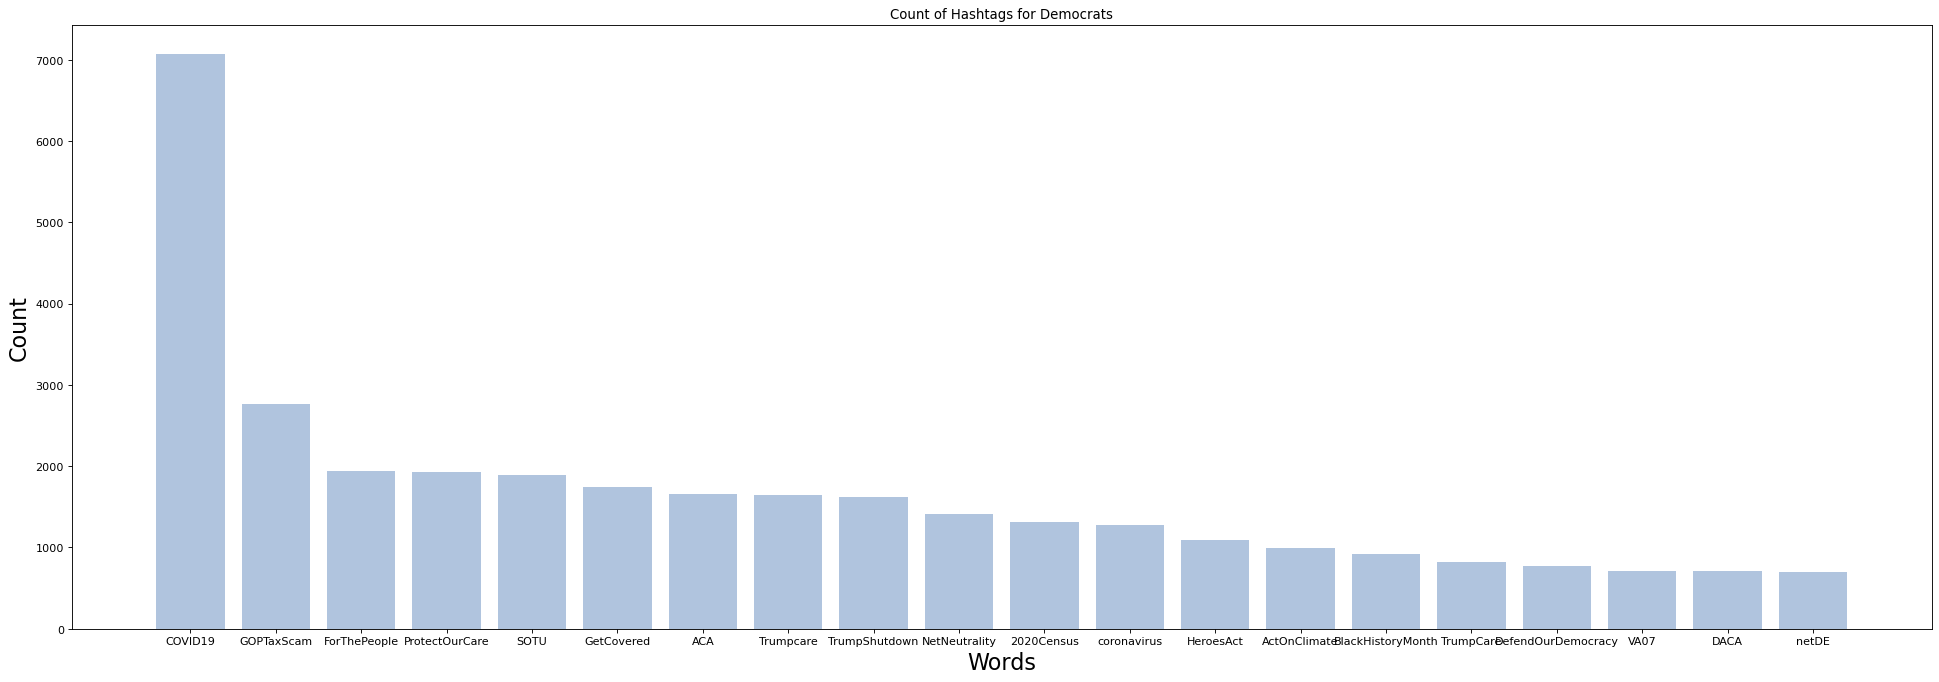

In [15]:
#Bar chart for the most frequent hashtags of Democrats:
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 10), dpi=80)
data = count_d.hashtags
plt.title('Count of Hashtags for Democrats')
plt.xlabel("Words",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.bar(count_d.index, data,color='lightsteelblue')
plt.show()

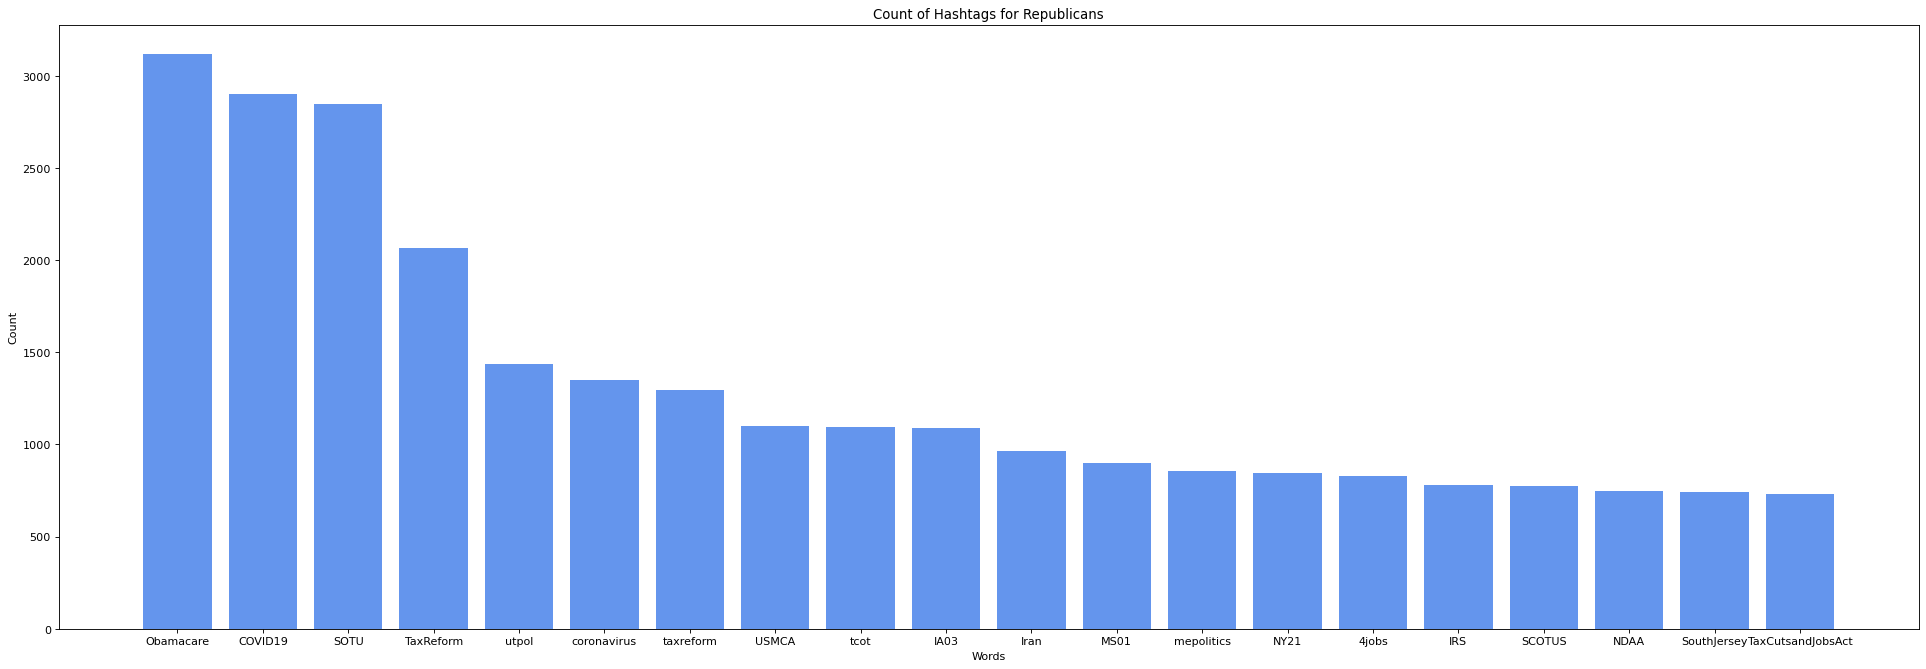

In [16]:
#Bar chart for the most frequent hashtags of Republicans:
plt.figure(figsize=(30, 10), dpi=80)
data = count_r.hashtags
plt.title('Count of Hashtags for Republicans')
plt.xlabel("Words")
plt.ylabel("Count")
plt.bar(count_r.index, data,color='cornflowerblue')
plt.show()

Make a table includes the supports of all words that are greater than 0.05 minimum support by using apriori. 

In [17]:
dem = df_hash.loc[train['party_id']=='D']
rep = df_hash.loc[train['party_id']=='R']

In [18]:
freq_itemsd = apriori(dem, min_support=0.005, use_colnames=True)

In [19]:
freq_itemsr = apriori(rep, min_support=0.005, use_colnames=True)

In [20]:
#Merge two tables together:
freq_items = pd.merge(freq_itemsd, freq_itemsr,left_index=True, right_index=True)
freq_items.columns = ['support_Democrats','itemsets_Democrats','support_Republicans','itemsets_Republicans']
freq_items

,support_Democrats,itemsets_Democrats,support_Republicans,itemsets_Republicans
0,0.008624,(2020census),0.011541,(4jobs)
1,0.012844,(aca),0.010391,(coronavirus)
2,0.007147,(actonclimate),0.018433,(covid19)
3,0.007150,(climatechange),0.005603,(gop)
4,0.009312,(coronavirus),0.006299,(ia03)
5,0.036391,(covid19),0.006746,(iran)
6,0.007955,(daca),0.005882,(irs)
7,0.007915,(dreamers),0.009635,(jobs)
8,0.005922,(endgunviolence),0.025927,(obamacare)
9,0.015632,(forthepeople),0.005964,(ohio)


## 1.3 clean the text data

### 1.3.1 remove `b'` and `b"`

The`full_text` maybe always start with the string `b'` or `b"` . Use the following code, I want to sure if the `full_text` always start with `b'` or `b"`. 

In [21]:
cnt = 0
for i in range(train.shape[0]):
    if train["full_text"][i][:2] != 'b"' and train["full_text"][i][:2] != "b'":
        cnt += 1
print(cnt)

0


The result is zero, so the `full_text` always start with `b'` or `b"`. I need to remove the string `b'` or `b"`.

In [22]:
train_data = train.drop(['favorite_count', 'hashtags', 'retweet_count', 'year'], axis=1)
test_data = test.drop(['Id', 'favorite_count', 'hashtags', 'retweet_count', 'year'], axis=1)

Take only the words and exculde `b'` and `b''`

In [23]:
train_data.full_text = train_data.full_text.apply(lambda x: x[2:-1])

In [24]:
test_data.full_text = test_data.full_text.apply(lambda x: x[2:-1])

In [25]:
train_data.full_text

0         RT @KUSINews: One of our longtime viewers was ...
1         Today I'm urging the @CDCgov to immediately la...
2         Tomorrow, #MO03 seniors graduate from Calvary ...
3         Congrats to #TeamUSA and Canton Native @JGreen...
4         Pleased to support @amergateways at their June...
                                ...                        
592798    This time, it focused on careers in #publicser...
592799    .#StormyDaniels, #MichaelWolfe, #JamesComey Ma...
592800    @NRDems The American people deserve the truth ...
592801    Only 2 weeks left to submit your #app to the C...
592802    The #MuslimBan remains as un-American and offe...
Name: full_text, Length: 592803, dtype: object

### 1.3.2 Remove punctuation

In [26]:
import string

def clean_text(df):
    df.full_text = df.full_text.apply(lambda x: x.translate(str.maketrans('','', string.punctuation)))

In [27]:
# remove punctuation
clean_text(train_data)
train_data.head()

,full_text,party_id
0,RT KUSINews One of our longtime viewers was in...,R
1,Today Im urging the CDCgov to immediately laun...,R
2,Tomorrow MO03 seniors graduate from Calvary Lu...,R
3,Congrats to TeamUSA and Canton Native JGreenwa...,R
4,Pleased to support amergateways at their June ...,D


In [28]:
# remove the punctuation
clean_text(test_data)
test_data.head()

,full_text,party
0,TaxReform improved the playing field for Ameri...,D
1,This NativeWomensEqualPay Day we recommit to p...,D
2,xe2x80x9cI became convinced that our generatio...,D
3,During NationalAdoptionMonth we honor the adop...,D
4,Happy AirborneDay to our USArmy paratroopers a...,D


### 1.3.3 Remove stop words

In [29]:
from nltk.corpus import stopwords
import re

In [30]:
stop_words = stopwords.words("english")

#list comprehension
#if every words not a stop words + not 'http' + not a digit + not any weird text
# return to a lower case, and strip quotation marks
def remove_stop_w(text):
    
    return " ".join([txt.lower().strip() for txt in text.split() 
                     if txt not in stop_words 
                     and txt.find("http")==-1 and not txt.isdigit()
                     and len(re.findall(r"x\w\wx\w\wx\w\w", txt)) == 0
                    ])

In [31]:
train_data.full_text = train_data.full_text.apply(remove_stop_w)

In [32]:
test_data.full_text = test_data.full_text.apply(remove_stop_w)

### 1.3.4 Include hashtags content

In [33]:
train_data.full_text = train_data.full_text + " " + train.hashtags.apply(str.lower)
test_data.full_text = test_data.full_text + " " + test.hashtags.apply(str.lower)

### 1.3.5 The Polarity of the full_text column:

Polarity means emotions expressed in a sentence. It lies in the range of [-1,1], where 1 means positive statement and -1 means a negative statement. 

In [34]:
from textblob import TextBlob
def polarity(text):
    return TextBlob(text).sentiment.polarity

train_data['polarity_score']=train_data['full_text'].apply(lambda x : polarity(x))

Text(0.5, 1.0, 'Sentiment polarity distribution')

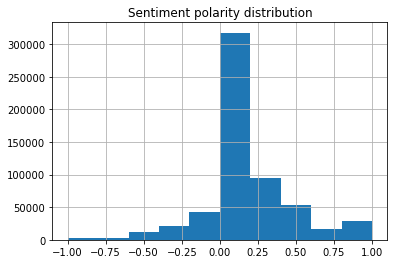

In [35]:
#Draw the sentiment polarity distribution graph:
train_data['polarity_score'].hist()
plt.title("Sentiment polarity distribution")

The polarity mainly ranges between 0.00 and 0.50. This indicates that the majority of the words in tweets are positive.

<BarContainer object of 3 artists>

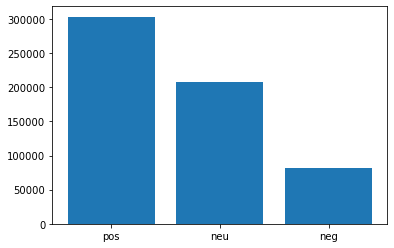

In [36]:
#Bar chart for positive's, negative's, and neutral's count:
def sentiment(x):
    if x<0:
        return 'neg'
    elif x==0:
        return 'neu'
    else:
        return 'pos'
    
train_data['polarity']=train_data['polarity_score'].map(lambda x: sentiment(x))

plt.bar(train_data.polarity.value_counts().index,
        train_data.polarity.value_counts())

In [37]:
train_data.polarity.value_counts()

pos    303201
neu    208044
neg     81558
Name: polarity, dtype: int64

51.47% of tweets are positive with 35.09% neutral and 13.76% negative.

# 2. Model

Apply TF-IDF vectorizer into the full_text column:

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [39]:
vectoriser = TfidfVectorizer(ngram_range = (1,1), max_features=400000)

In [40]:
vectoriser.fit(train_data['full_text'])
X_train = vectoriser.transform(train_data['full_text'])
X_test  = vectoriser.transform(test_data['full_text'])
y_train = train_data['party_id']
y_test = test_data['party']

In [41]:
#Get features' names
features = vectoriser.get_feature_names()

## Model fit

Build up the logistic regression model and fit the model to make prediction:

In [42]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
clf = LogisticRegressionCV(cv=5, random_state=265, max_iter=50, n_jobs=-1)

In [43]:
clf_fit = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

score = clf.score(X_test, y_test)
print(f"test score : {score}")
print(f"train score: {clf.score(X_train, y_train)}")

/Users/lishangao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/lishangao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

/Users/lishangao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/lishangao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

test score : 0.5466603773584906
train score: 0.9476959462080995


Make a dataframe to store all coefficients of words and sorted them in ascending order:

In [47]:
print(clf.coef_, clf.intercept_)
coef = clf.coef_

[[-6.84664661e-04  1.72814018e+00 -6.00233548e-01 ... -1.61882235e+00
  -2.40134659e+00 -9.71862348e-03]] [0.16453251]


In [48]:
coef = clf.coef_
coef = coef[0]
coef_df = pd.DataFrame(coef, columns=["Coefficients"],index = features)

In [49]:
coef_df.sort_values('Coefficients',inplace =True)
coef_df

,Coefficients
goptaxscam,-17.886353
forthepeople,-17.330897
trumpshutdown,-16.748860
ri,-16.611373
defendourdemocracy,-16.261702
...,...
arkansas,16.179140
va05,16.410047
tx22,16.535691
mi06,17.392245


# 3. Predict

In [50]:
df = pd.DataFrame(columns=['Id','party'])
df['party'] = y_pred
df['Id'] = df.index
df

,Id,party
0,0,R
1,1,D
2,2,D
3,3,R
4,4,R
...,...,...
264995,264995,D
264996,264996,R
264997,264997,D
264998,264998,R


In [51]:
df.to_csv('submission.csv',index=False)